In [43]:
%run th2fds.ipynb

In [27]:
from scipy.signal import welch

In [28]:
def fileI(filename):
    tmp = []
    f = open(filename,'r');
    lines = f.readlines()
    for line in lines:
        tmp.append(line);
    out=np.zeros([len(tmp),2]);
    for i in range(len(out)):
        out[i,:] = np.array(tmp[i].split()).astype(np.float)
    return out;

In [29]:
data=fileI("th_fullPSD.txt");
data1=fileI("th_band1.txt");
data2=fileI("th_band2.txt");
data3=fileI("th_ovl_band1.txt");
data4=fileI("th_ovl_band2.txt");

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_25318/4169597666.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[i,:] = np.array(tmp[i].split()).astype(np.float)


In [30]:
t,th=data[:,0],data[:,1];
t1,th1 = data1[:,0],data1[:,1];
t2,th2 = data2[:,0],data2[:,1];
t3,th3 = data3[:,0],data3[:,1];
t4,th4 = data4[:,0],data4[:,1];

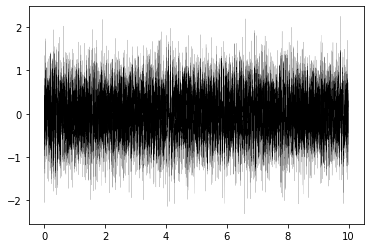

In [31]:
%matplotlib inline
plt.plot(t,th,'k-',lw=0.1);

In [32]:
data = fileI("PSD_full.txt");
data1 = fileI("PSD_band1.txt");
data2 = fileI("PSD_band2.txt");
data3 = fileI("PSD_ovl_band1.txt");
data4 = fileI("PSD_ovl_band2.txt");

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_25318/4169597666.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[i,:] = np.array(tmp[i].split()).astype(np.float)


In [33]:
fi,pi=data[:,0],data[:,1];
fi1,pi1 = data1[:,0],data1[:,1];
fi2,pi2 = data2[:,0],data2[:,1];
fi3,pi3 = data3[:,0],data3[:,1];
fi4,pi4 = data4[:,0],data4[:,1];


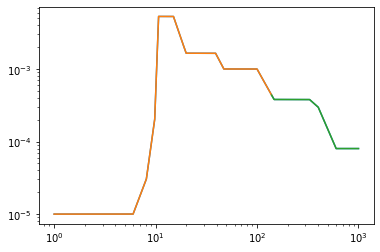

In [34]:
plt.loglog(fi,pi);
plt.loglog(fi1,pi1);
plt.loglog(fi2,pi2);

In [35]:
ft = np.logspace(0,3,100);

In [44]:
fn,fd=th2fds_smallwood(lftab=ft,ldtab=th,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);
fn1,fd1=th2fds_smallwood(lftab=ft,ldtab=th1,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);
fn2,fd2=th2fds_smallwood(lftab=ft,ldtab=th2,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);

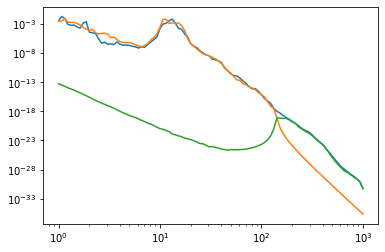

In [45]:
plt.loglog(fn,fd);
plt.loglog(fn1,fd1);
plt.loglog(fn2,fd2);

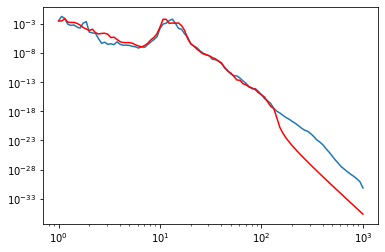

In [46]:
plt.loglog(fn,fd);
plt.loglog(fn1,fd1,'r-');

In [ ]:
fn3,fd3=th2fds_smallwood(lftab=ft,ldtab=th3,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);
fn4,fd4=th2fds_smallwood(lftab=ft,ldtab=th4,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);

In [ ]:
rD=fd/(fd1+fd2);
rD1=fd/(fd3+fd4);

In [ ]:
plt.plot(fn,rD,'k--');
plt.plot(fn,rD1,'r-');

In [ ]:
# PSD Check
sps = 2**13; 
dt = t[1]-t[0];
freq_syn,psd_syn = welch(th,fs = 1/dt,nperseg=sps);
plt.figure(figsize=(12,8));
plt.loglog(fi,pi,'k-',label='original');
#plt.loglog(fi,pi*1.1,'b--',label='original(10%)');
#plt.loglog(fi,pi/1.1,'b--',label='original(-10%)');
plt.loglog(freq_syn,psd_syn,'r-',label='syn'); plt.legend(loc='upper right');
plt.xlim(1,1000);

In [ ]:
# PSD Check
sps = 2**13; 
dt = t1[1]-t1[0];
freq_syn,psd_syn = welch(th1,fs = 1/dt,nperseg=sps);
plt.figure(figsize=(12,8));
plt.loglog(fi1,pi1,'k-',label='original');
#plt.loglog(fi,pi*1.1,'b--',label='original(10%)');
#plt.loglog(fi,pi/1.1,'b--',label='original(-10%)');
plt.loglog(freq_syn,psd_syn,'r-',label='syn'); plt.legend(loc='upper right');
plt.xlim(1,1000);

In [ ]:
# PSD Check
sps = 2**13; 
dt = t3[1]-t3[0];
freq_syn,psd_syn = welch(th3,fs = 1/dt,nperseg=sps);
plt.figure(figsize=(12,8));
plt.loglog(fi3,pi3,'k-',label='original');
#plt.loglog(fi,pi*1.1,'b--',label='original(10%)');
#plt.loglog(fi,pi/1.1,'b--',label='original(-10%)');
plt.loglog(freq_syn,psd_syn,'r-',label='syn'); plt.legend(loc='upper right');
plt.xlim(1,1000);

In [ ]:
reld1=SDOF_smallwood(th1,dt,fn=11,zeta=0.04,out_opt=2)

reld2=SDOF_smallwood(th1,dt,fn=300,zeta=0.04,out_opt=2)


In [ ]:
plt.plot(t3,reld1,'k-');
plt.plot(t3,reld2,'r-');

In [ ]:
rcc = rainflow.count_cycles(reld1); # rainflow counting
rang, cycle = np.zeros(len(rcc)),np.zeros(len(rcc));
for i in range(len(rcc)):
    rang[i] = rcc[i][0];
    cycle[i] = rcc[i][1];
    fds1 = sum((rang**8)*cycle)/1;

In [ ]:
rcc = rainflow.count_cycles(reld2); # rainflow counting
rang, cycle = np.zeros(len(rcc)),np.zeros(len(rcc));
for i in range(len(rcc)):
    rang[i] = rcc[i][0];
    cycle[i] = rcc[i][1];
    fds2 = sum((rang**8)*cycle)/1;

In [ ]:
fds1

In [ ]:
fds2

In [ ]:
plt.loglog(fn1,fd1);

In [ ]:
t[1]-t[0]

In [ ]:
t1[1]-t1[0]

In [ ]:
plt.loglog(fi,pi);
plt.loglog(fi1,pi1);